In [1]:
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LogNorm
import itertools
from matplotlib import gridspec
from scipy.signal import find_peaks

pd.option_context('display.max_columns', -1)

pd.options.mode.chained_assignment = None #Disabpd.option_context('display.max_columns', 300)le copy warnings
# plt.style.use('fivethirtyeight') #Set style
# mpl.rcParams.update({'figure.figsize' : (15,10)})  #Set general plotting options
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

plt.rcParams.update({"savefig.dpi" : 300}) #Figure resolution


#Define plotting style:
sns.set() #Set style
sns.set_style('ticks',{'font.family':'Times New Roman', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
cm = plt.colormaps.get_cmap('RdYlBu')

# Dados

In [2]:
#Importando os dados de um arquivo .csv
data = pd.read_csv('Dados_PenduloFisico/amortecido/amortecido.txt', header = 0, sep = '\t', encoding='latin-1')

In [3]:
tempo = np.array(data['Tempo ( s )']) - 7.8720
angulo = np.array(data['Posição angular ( graus )'])

for i,t in enumerate(tempo):
    if t >= 0:
        tempo = tempo[i:]
        angulo = angulo[i:]
        break


# Gráfico

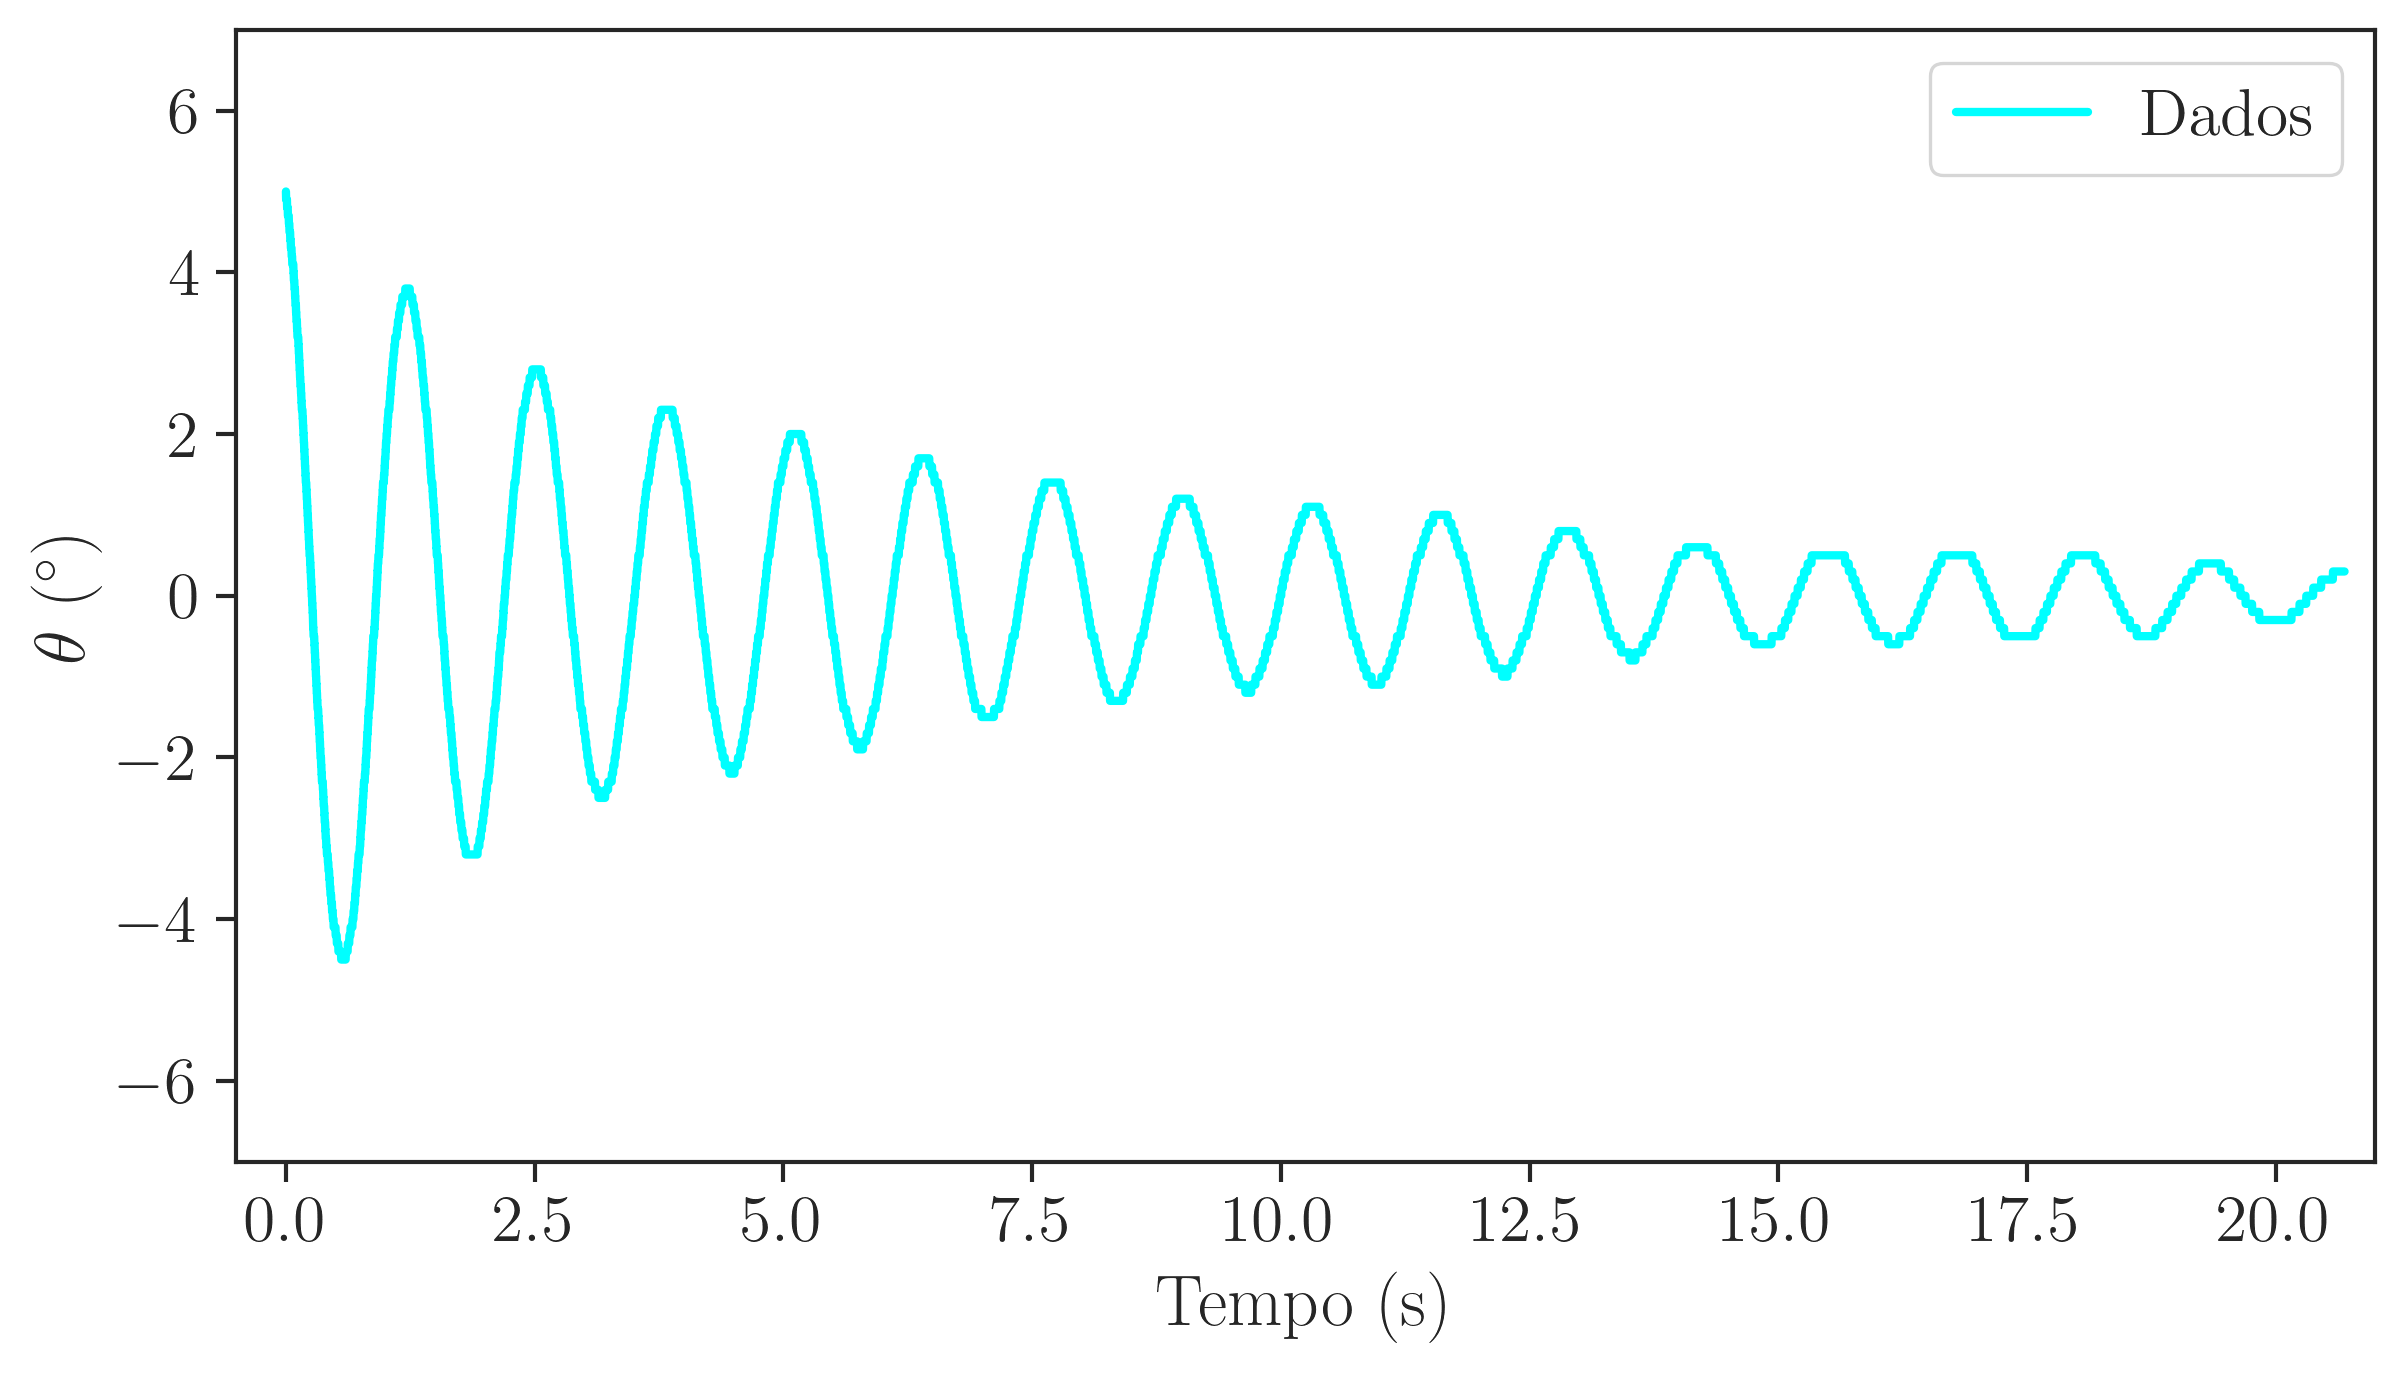

In [4]:
plt.figure(figsize = [9.2,4.9], dpi = 300) 
plt.plot(tempo, angulo, lw =2, color = 'aqua', label = r'Dados')
#Visualização dos picos
#plt.scatter(tempo_5_345[peaks], angulo_5_345[peaks], color = 'red')


plt.ylabel(r'$\theta \ ({}^\circ)$')
plt.xlabel('Tempo (s)')
plt.xlim([-0.5,21])
plt.ylim([-7,7])
plt.legend()
plt.savefig('Graphs/PenduloFisico/Dados_amortecido.pdf')
plt.show()

# Gráfico da amplitude em função do tempo

In [5]:
peaks, _ = find_peaks(angulo, height=0)

In [6]:
print("Amplitude:",angulo[peaks])

print("Instante de tempo da amplitude", tempo[peaks])

Amplitude: [3.8 2.8 2.3 2.  1.7 1.4 1.2 1.1 1.  0.8 0.6 0.5 0.5 0.5 0.4]
Instante de tempo da amplitude [ 1.222  2.518  3.828  5.122  6.412  7.704  9.016 10.32  11.604 12.88
 14.18  15.502 16.796 18.064 19.338]


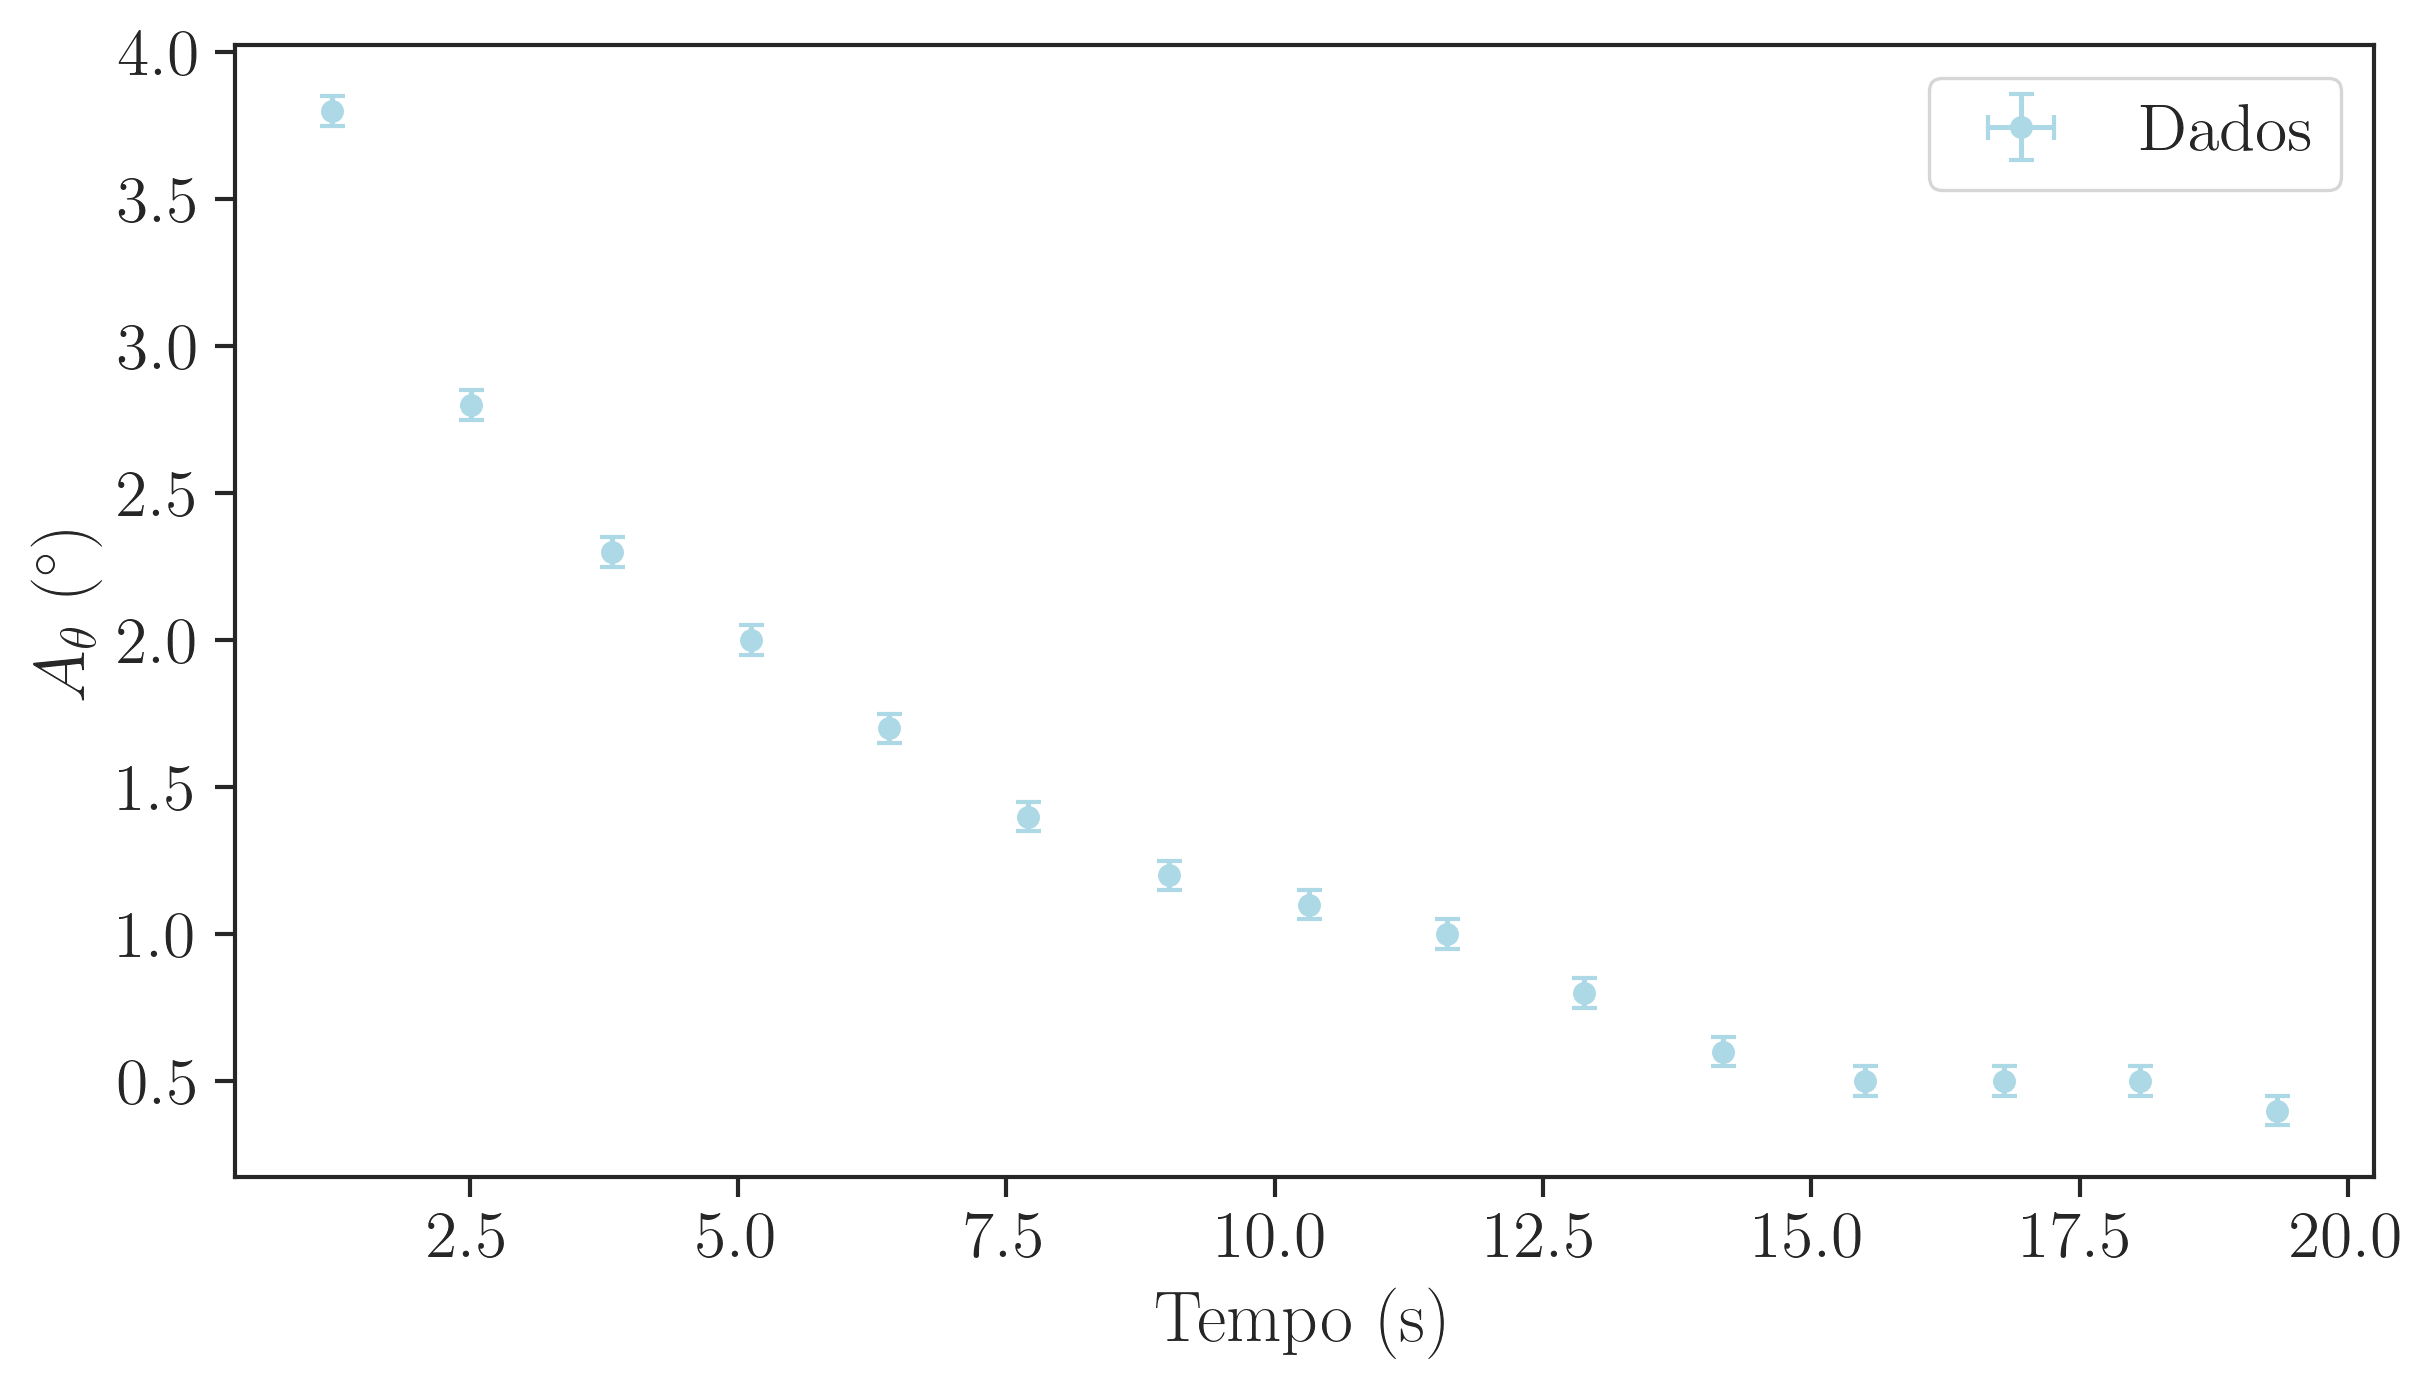

In [7]:
plt.figure(figsize = [9.2,4.9], dpi = 300) 
plt.errorbar(tempo[peaks], angulo[peaks],5e-2 ,7e-5, 'o',ms = 4.5, capsize=3, color = 'lightblue', label = r'Dados')
#Visualização dos picos
#plt.scatter(tempo_5_345[peaks], angulo_5_345[peaks], color = 'red')


plt.ylabel(r'$A_\theta \ ({}^\circ)$')
plt.xlabel('Tempo (s)')

plt.legend()
plt.savefig('Graphs/PenduloFisico/Amplitude_amortecido.pdf')
plt.show()

## Linearizando os dados

Da teoria, nós sabemos que a amplitude deve seguir a seguinte relação:

$$A_\theta(t) = \theta_0 e^{-\frac{b}{2I}t}$$

Tendo isto em vista, podemos aplicar o logaritmo natural dos dois lados para termos uma relação linear:

$$\ln{A_\theta(t)} = \ln{\theta_0} + \ln{e^{-\frac{b}{2I}t}}$$
$$\ln{A_\theta(t)} = \ln{\theta_0} -\frac{b}{2I}t$$

Ao calcularmos o logaritmo natural da amplitude, também devemos propagar sua incerteza:

$$\sigma_{A_\theta} = \bigg\vert\frac{d\ln{A_\theta}}{dA_\theta}\bigg\vert\sigma_{A_\theta} = \frac{\sigma_{A_\theta}}{A_\theta}$$

In [8]:
#Definindo a amplitude e sua incerteza
sigma_amp = 5e-2 #graus
amp = angulo[peaks]

#Calculando o logaritmo natural e sua incerteza
ln_amp = np.log(amp)
sigma_ln_amp = sigma_amp/amp
sigma_ln_amp = [float('{:g}'.format(float('{:.1g}'.format(sigma)))) for sigma in sigma_ln_amp]
print('ln_amp:', ln_amp)
print()
print('sigma_ln_amp:', sigma_ln_amp)

ln_amp: [ 1.33500107  1.02961942  0.83290912  0.69314718  0.53062825  0.33647224
  0.18232156  0.09531018  0.         -0.22314355 -0.51082562 -0.69314718
 -0.69314718 -0.69314718 -0.91629073]

sigma_ln_amp: [0.01, 0.02, 0.02, 0.03, 0.03, 0.04, 0.04, 0.05, 0.05, 0.06, 0.08, 0.1, 0.1, 0.1, 0.1]


## Gráfico dos dados linearizados

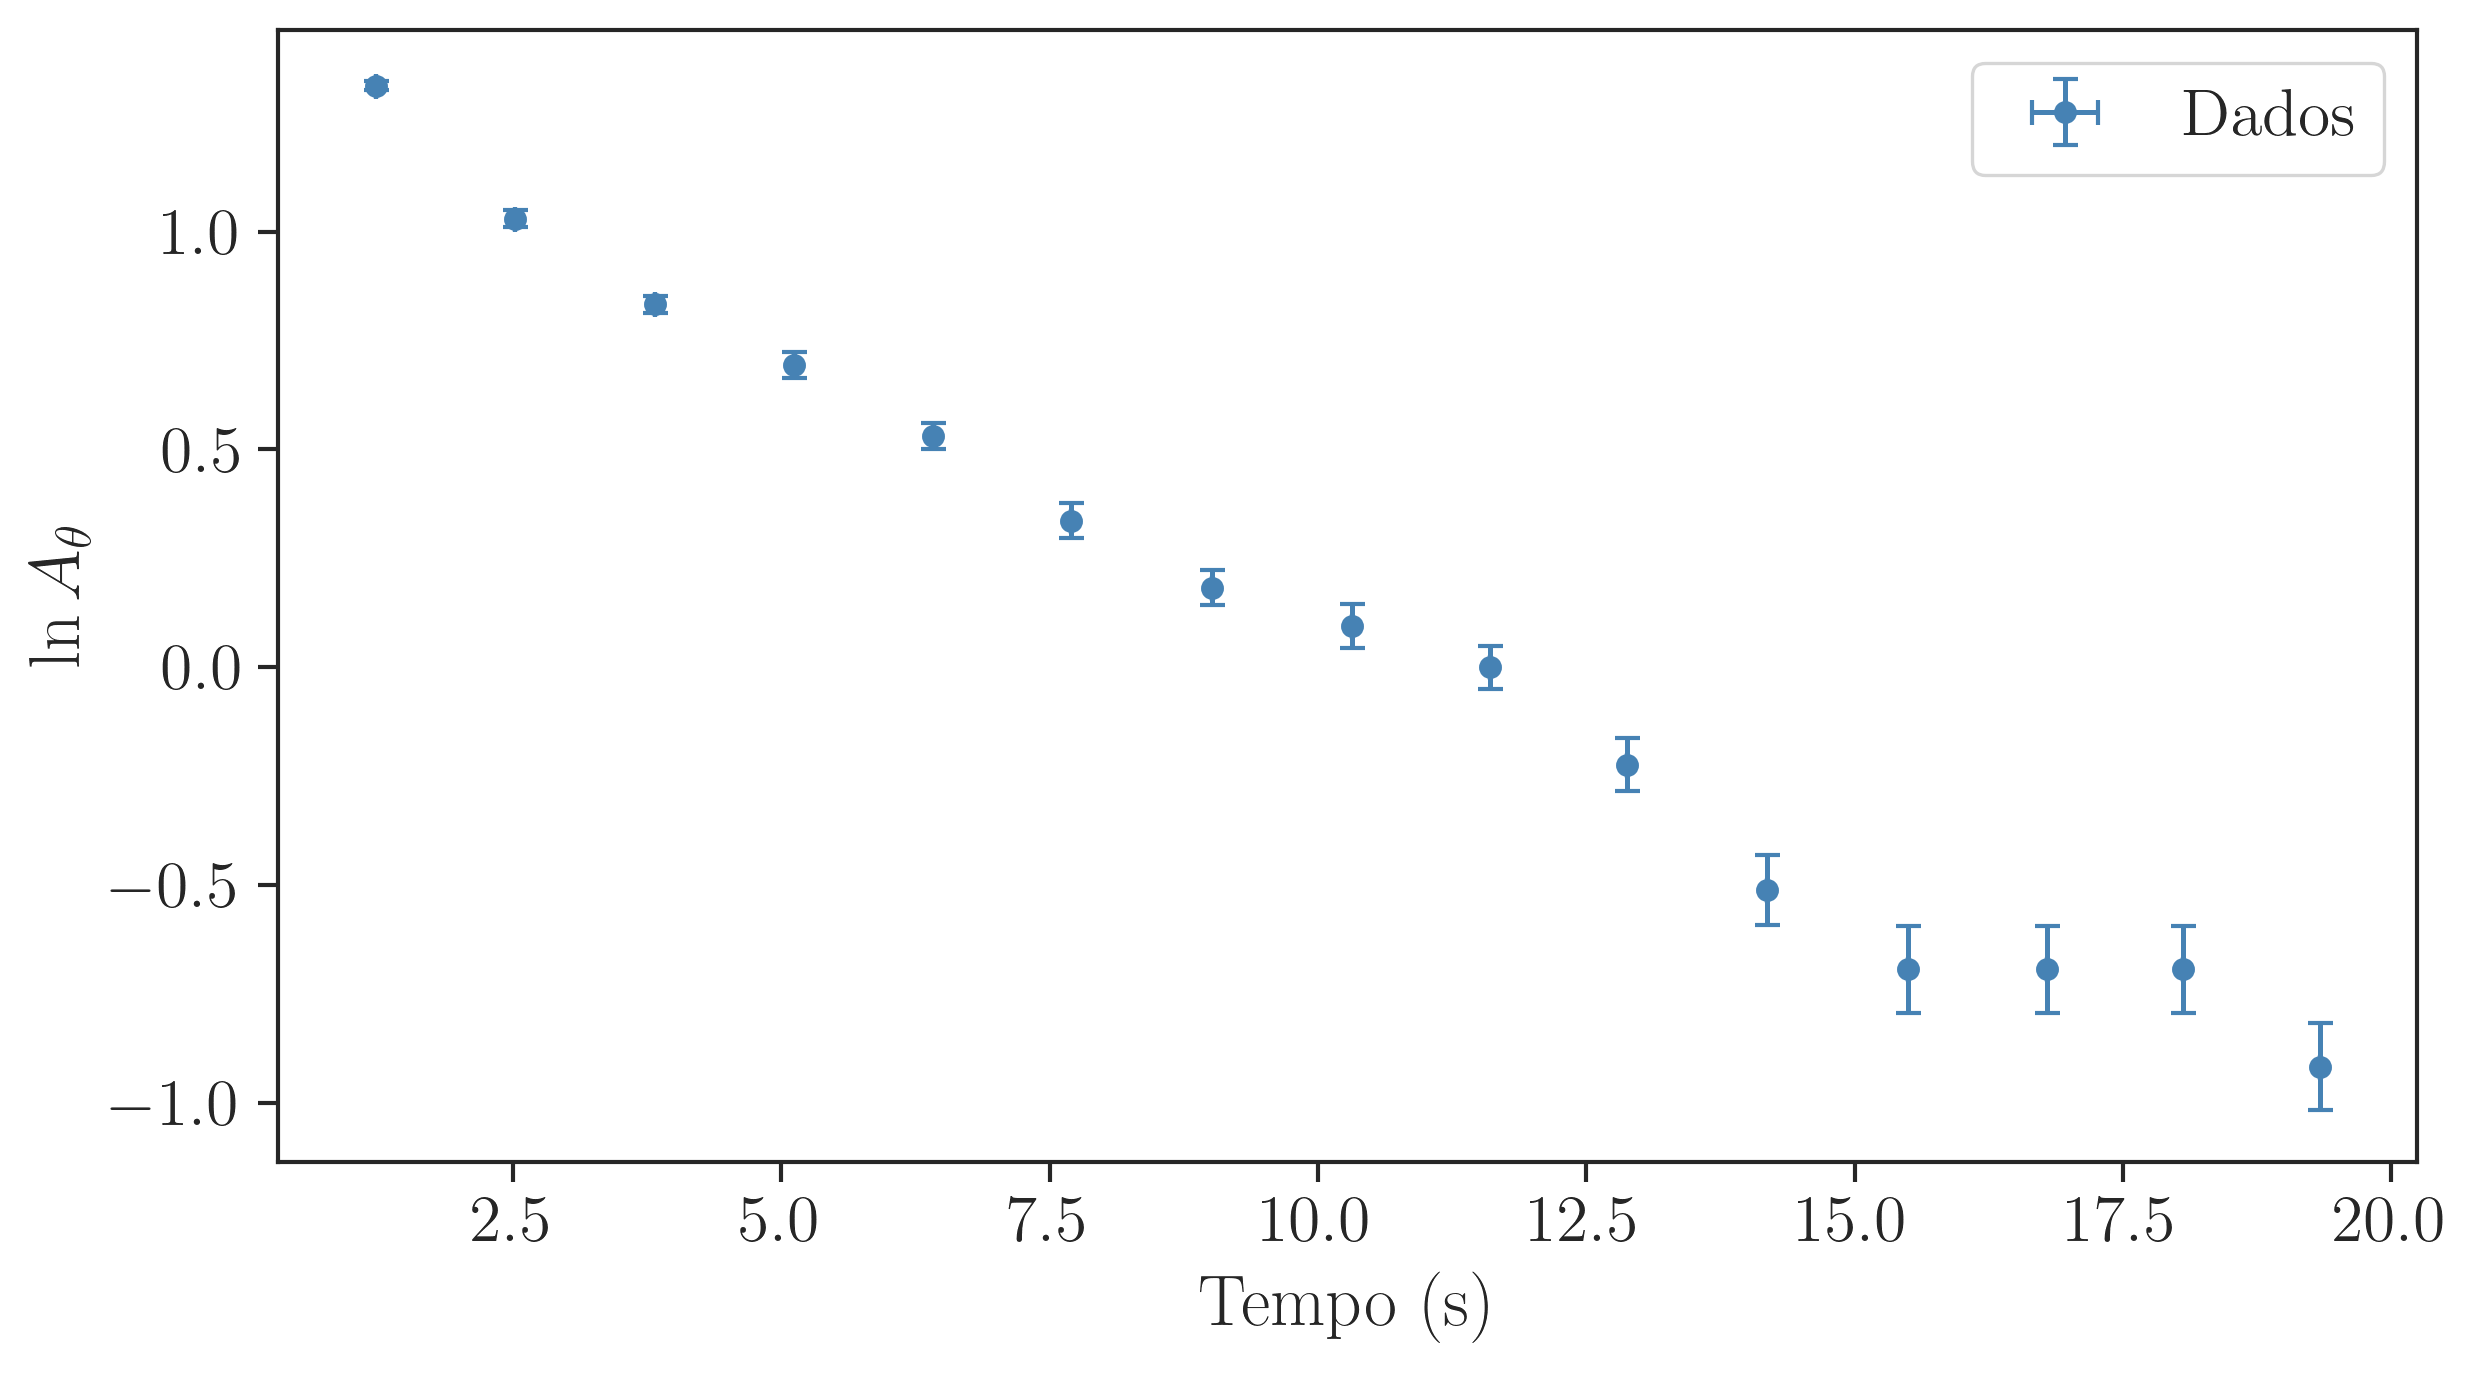

In [9]:
plt.figure(figsize = [9.2,4.9], dpi = 300) 
plt.errorbar(tempo[peaks], ln_amp,sigma_ln_amp ,5e-5, 'o',ms = 4.5, capsize=3, color = 'steelblue', label = r'Dados')
#Visualização dos picos
#plt.scatter(tempo_5_345[peaks], angulo_5_345[peaks], color = 'red')


plt.ylabel(r'$\ln{A_{\theta}}$')
plt.xlabel('Tempo (s)')

plt.legend()
plt.savefig('Graphs/PenduloFisico/Amplitude_linearizada.pdf')
plt.show()

# Ajuste linear

In [10]:
fitpars, cov_pars = np.polyfit(tempo[peaks],ln_amp,1,w=np.power(sigma_ln_amp,-1),cov='True')
#print(fitpars, cov_pars)

coef_angular = fitpars[0]
coef_linear = fitpars[1]
sigma_angular = np.sqrt(cov_pars[0][0])
sigma_linear = np.sqrt(cov_pars[1][1])

sigma_angular = float('{:g}'.format(float('{:.1g}'.format(sigma_angular))))
sigma_linear = float('{:g}'.format(float('{:.1g}'.format(sigma_linear))))

                     
print('Coeficiente angular: %.3f +- %.3f Hz' % (coef_angular ,sigma_angular))
print('Coeficiente linear: %.2f +- %.2f' %(coef_linear,sigma_linear))

Coeficiente angular: -0.136 +- 0.006 Hz
Coeficiente linear: 1.45 +- 0.03


In [11]:
#Calulando chi^2_red
yhat = np.polyval(fitpars, tempo[peaks])
chi_squared = np.sum(((yhat - ln_amp)/sigma_ln_amp) ** 2)
chi2_red = chi_squared/(len(ln_amp)-2)

#Imprimindo o resultado
print("chi^2_red = %.3f" % chi2_red)

chi^2_red = 7.934


## Gráfico do ajuste linear

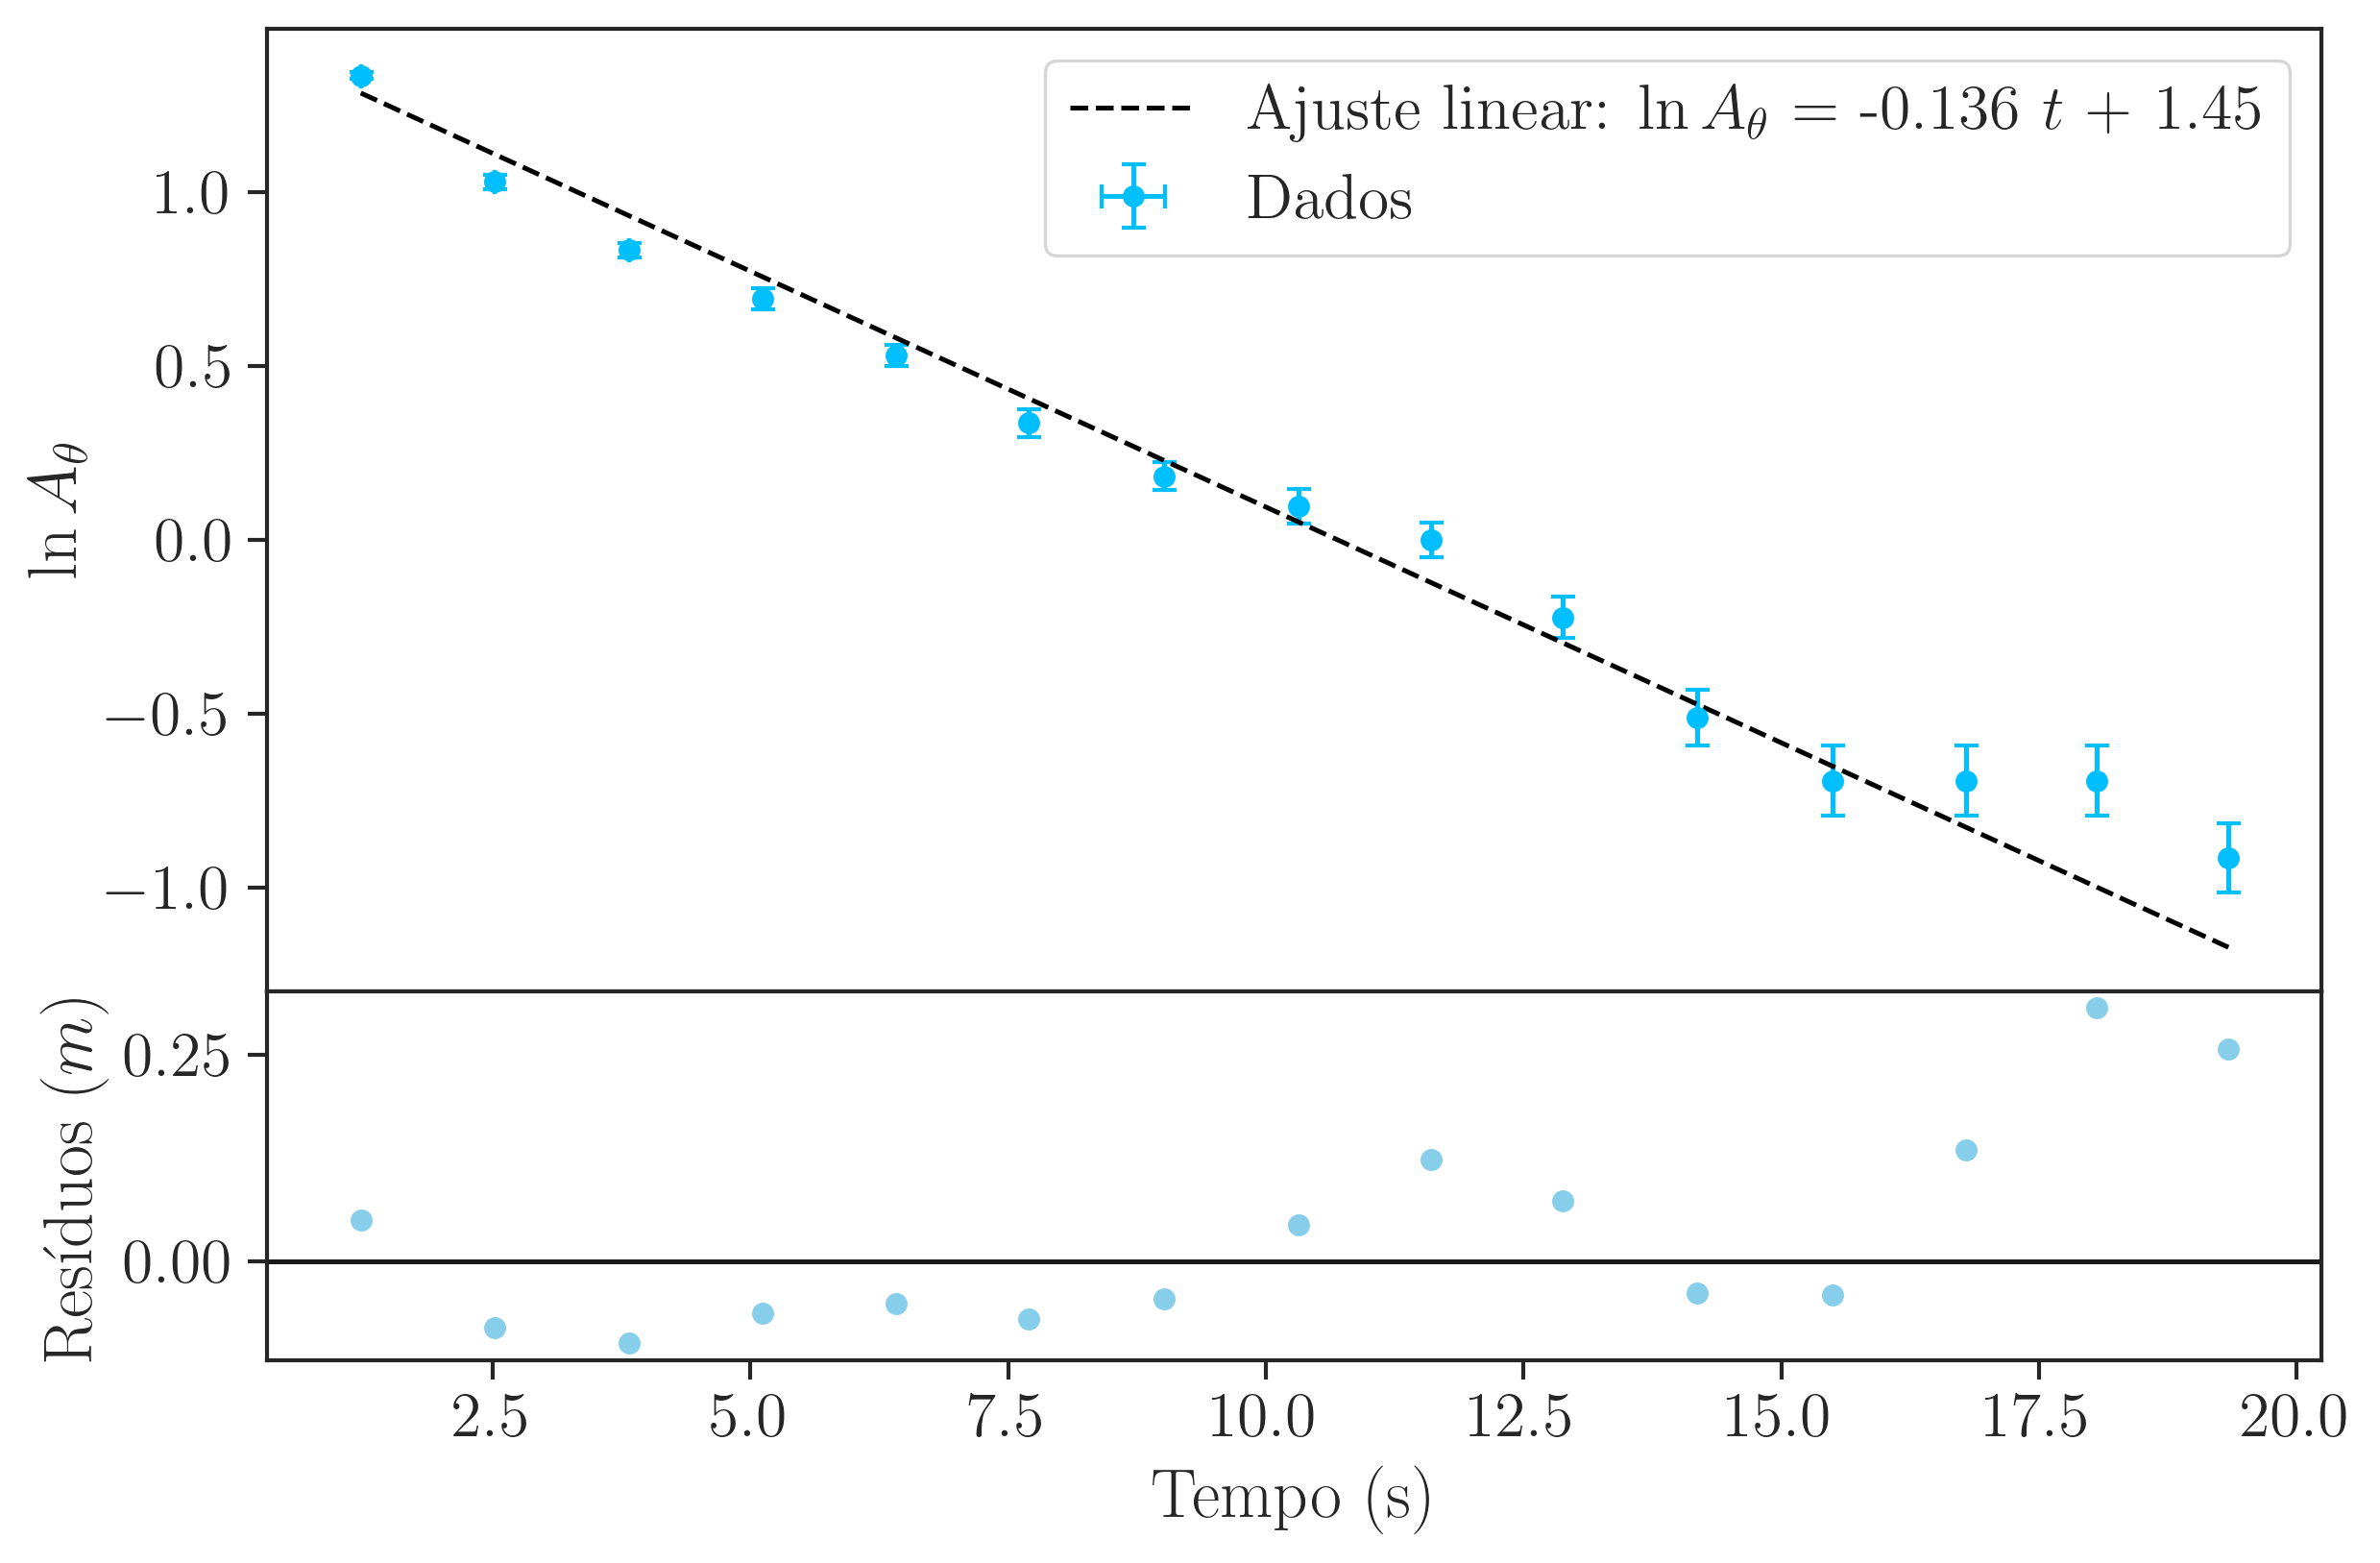

In [12]:
fig = plt.figure(figsize = [9.2,6], dpi = 300) 
gs = fig.add_gridspec(2,1, hspace=0, height_ratios=[6, 2.3])
axs = gs.subplots(sharex=True)


#Gráfico principal
axs[0] = plt.subplot(gs[0])
axs[0].errorbar(tempo[peaks],ln_amp, sigma_ln_amp,5e-5, 'o', ms = 4.5, capsize=3, color = 'deepskyblue', label = 'Dados')
axs[0].plot(tempo[peaks],(tempo[peaks]*coef_angular + coef_linear), color ='black', ls = '--',
         label = r'Ajuste linear: $\ln{A_\theta}$ = %.3f $t$ + %.2f' % (coef_angular,abs(coef_linear)))
axs[0].set_ylabel(r'$\ln{A_{\theta}}$')
axs[0].legend()
axs[0].set_title('')

#Gráfico de resíduos
axs[1] = plt.subplot(gs[1])
resid = (ln_amp - yhat)
axs[1].plot(tempo[peaks], resid, 'o',ms = 4.5,  color = 'skyblue', label = 'Residuos')
axs[1].axhline(y=0, color='k', linestyle='-')
axs[1].set_ylabel(r"Resíduos ($m$)")

#axs[0].plot(a,(a*0.2768), color ='black', ls = '--',
         #label = r'Ajuste linear: $F_r$ = %.3f $a$ - %.2f' % (coef_angular,abs(coef_linear)))

plt.xlabel('Tempo (s)')


#plt.savefig('Graphs/RodaMaxwell/AjusteLin.pdf')
plt.savefig('Graphs/PenduloFisico/Ajuste_amortecido.pdf')
plt.show()

# Calculando o coeficiente de amortecimento

Como mencionamos na linearização dos dados:

$$\ln{A_\theta(t)} = \ln{\theta_0} -\frac{b}{2I}t$$

Comparando com o ajuste linear 
$\ln{A_\theta(t)} = c_a \ t + c_l$ que realizamos, vemos que o significado físico dos coeficientes são:

$$c_a = -\frac{b}{2I}$$

$$c_l = \ln{\theta_0}$$

Para encontrarmos o coeficiente de amortecimento $b$, podemos isolá-lo na primeira equação:

$$b = -2I c_a $$


A incerteza associada a esta grandeza pode ser obtida através da propagação dos erros do momento de inércia e do coeficiente angular ajustado da seguinte forma:


$$\sigma_b = \sqrt{\left(\frac{\partial b}{\partial I}\right)^2 \sigma_I^2 + \left(\frac{\partial b}{\partial c_a}\right)^2 \sigma_{c_a}^2}$$

$$\sigma_b = \sqrt{\left(\frac{\partial }{\partial I}2I c_a\right)^2 \sigma_I^2 + \left(\frac{\partial }{\partial c_a}2I c_a\right)^2 \sigma_{c_a}^2}$$

$$\sigma_b = \sqrt{\left(2 c_a\right)^2 \sigma_I^2 + \left(2I\right)^2 \sigma_{c_a}^2}$$

$$\sigma_b = 2I\vert c_a\vert\sqrt{\left(\frac{\sigma_I}{I}\right)^2 + \left(\frac{\sigma_{c_a}}{c_a}\right)^2}$$

Nós vimos que para $y_m =34.5 cm$ e $\theta_0 = 5^\circ$, $I = (0.01020 \pm 0.00002) \ (kg m^2)$. Além disto, $c_a = (-0.136 \pm 0.006) \ Hz$. Logo:

In [13]:
b = 2*0.01020*0.136

sigma_b = b * np.sqrt((0.00002/0.01020)**2 + (0.006/0.136)**2 )
sigma_b = float('{:g}'.format(float('{:.1g}'.format(sigma_b))))

print('b = (%.4f +- %.4f) (kg m^2/s)' % (b, sigma_b))

b = (0.0028 +- 0.0001) (kg m^2/s)


In [14]:
print(np.exp(coef_linear))
print(np.exp(coef_linear) * sigma_linear)

4.267864726060184
0.12803594178180552
